## **1. Configurer l'environnement**

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import random
import tensorflow as tf


## **2. TÉLÉCHARGER ET PRÉPARER LE DATASET**

### **2.2. Télécharger le dataset depuis Kaggle**

In [ ]:
# Installer kaggle API
!pip install -q kaggle

# Créer le dossier .kaggle et uploader notre token API
from google.colab import files
files.upload()  # Uploader notre fichier kaggle.json

# Déplacer le fichier
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Télécharger le dataset
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

# Décompresser
!unzip -q new-plant-diseases-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:45<00:00, 66.2MB/s]
100% 2.70G/2.70G [00:45<00:00, 63.3MB/s]


### **2.2 Explorer la structure des données**

In [ ]:
import os

# Vérifier la structure
base_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_path = os.path.join(base_path, "train")
valid_path = os.path.join(base_path, "valid")

print("Structure des dossiers:")
print("Train:", len(os.listdir(train_path)), "classes")
print("Valid:", len(os.listdir(valid_path)), "classes")

# Afficher un exemple par classe
for i, class_name in enumerate(os.listdir(train_path)[:5]):
    class_path = os.path.join(train_path, class_name)
    images = os.listdir(class_path)[:3]
    print(f"\n{class_name}: {len(os.listdir(class_path))} images")
    for img in images[:2]:
        print(f"  - {img}")

Structure des dossiers:
Train: 38 classes
Valid: 38 classes

Pepper,_bell___healthy: 1988 images
  - 540efd70-a3a8-4c12-8414-a8825c6c6ae6___JR_HL 7978.JPG
  - 3ede2904-b21a-4b6a-940b-062c21ff71fa___JR_HL 7613_new30degFlipLR.JPG

Cherry_(including_sour)___healthy: 1826 images
  - 760d41a1-3aca-4ceb-b8ef-12a3b62f785d___JR_HL 4019_flipTB.JPG
  - b1811d59-98ff-43ef-a618-ad91d3bbaeed___JR_HL 9518.JPG

Tomato___Target_Spot: 1827 images
  - 2e7e9a37-1d74-4435-94a6-6ac966447e75___Com.G_TgS_FL 9853.JPG
  - bfd93723-d2d2-405a-924f-8f5adc443d6c___Com.G_TgS_FL 0797.JPG

Apple___Cedar_apple_rust: 1760 images
  - 763123be-8a12-4d7a-8fa5-deff863b70f9___FREC_C.Rust 3691_270deg.JPG
  - f0d04e6e-18c3-4c74-a56c-609b5035f358___FREC_C.Rust 4231_180deg.JPG

Pepper,_bell___Bacterial_spot: 1913 images
  - f7b2c446-72fe-4990-91cc-8764e819ad3b___JR_B.Spot 9004_flipTB.JPG
  - 644b37d1-495a-40ef-9cff-163a97016d71___JR_B.Spot 3269_flipTB.JPG


## **3. ANALYSE ET VISUALISATION DES DONNÉES**


### **3.1. Analyse statistique**

In [ ]:
# Compter les images par classe
def count_images_per_class(path):
    counts = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            counts[class_name] = len(os.listdir(class_path))
    return counts

train_counts = count_images_per_class(train_path)
valid_counts = count_images_per_class(valid_path)

print("Nombre total d'images d'entraînement:", sum(train_counts.values()))
print("Nombre total d'images de validation:", sum(valid_counts.values()))

# Créer un DataFrame pour l'analyse
df_train = pd.DataFrame(list(train_counts.items()), columns=['Classe', 'Train'])
df_valid = pd.DataFrame(list(valid_counts.items()), columns=['Classe', 'Valid'])
df_stats = pd.merge(df_train, df_valid, on='Classe')
df_stats['Total'] = df_stats['Train'] + df_stats['Valid']
df_stats = df_stats.sort_values('Total', ascending=False)

print("\nTop 10 classes avec le plus d'images:")
print(df_stats.head(10).to_string())

Nombre total d'images d'entraînement: 70295
Nombre total d'images de validation: 17572

Top 10 classes avec le plus d'images:
                                      Classe  Train  Valid  Total
37                         Soybean___healthy   2022    505   2527
24                        Apple___Apple_scab   2016    504   2520
34  Orange___Haunglongbing_(Citrus_greening)   2010    503   2513
21                           Apple___healthy   2008    502   2510
0                     Pepper,_bell___healthy   1988    497   2485
19                         Apple___Black_rot   1987    497   2484
23    Tomato___Tomato_Yellow_Leaf_Curl_Virus   1961    490   2451
6                       Potato___Late_blight   1939    485   2424
7                      Potato___Early_blight   1939    485   2424
9                           Tomato___healthy   1926    481   2407


### **3.2. Visualiser des exemples**

Exemples d'images d'entraînement:


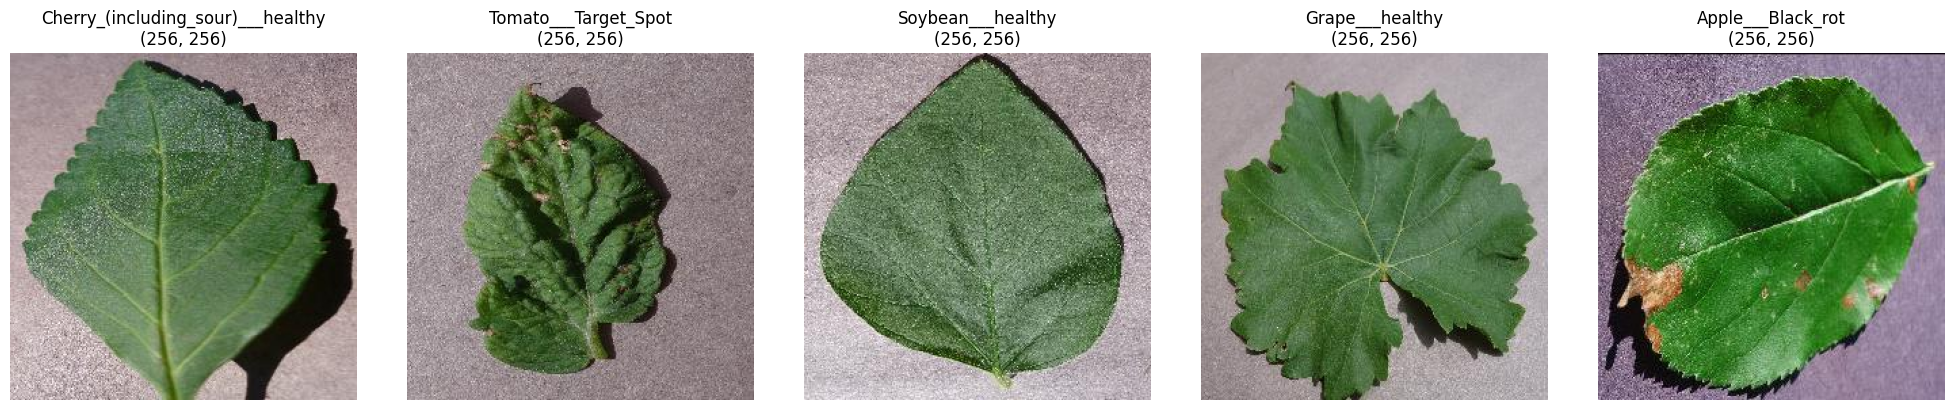

In [ ]:
def visualize_samples(path, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))

    classes = random.sample(os.listdir(path), num_samples)

    for i, class_name in enumerate(classes):
        class_path = os.path.join(path, class_name)
        images = os.listdir(class_path)
        img_name = random.choice(images)
        img_path = os.path.join(class_path, img_name)

        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"{class_name}\n{img.size}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("Exemples d'images d'entraînement:")
visualize_samples(train_path, 5)

## **4. PRÉPARATION DES DONNÉES POUR LE MODÈLE**

### **4.1. Créer les datasets TensorFlow**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paramètres
IMG_SIZE = 128
BATCH_SIZE = 32

# Data augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Pas d'augmentation pour la validation
valid_datagen = ImageDataGenerator(rescale=1./255)

# Créer les générateurs
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Vérifier
print("Classes:", train_generator.class_indices)
print("Nombre de classes:", len(train_generator.class_indices))

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Classes: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27

### **4.2. Vérifier un batch**

Shape des images: (32, 128, 128, 3)
Shape des labels: (32, 38)


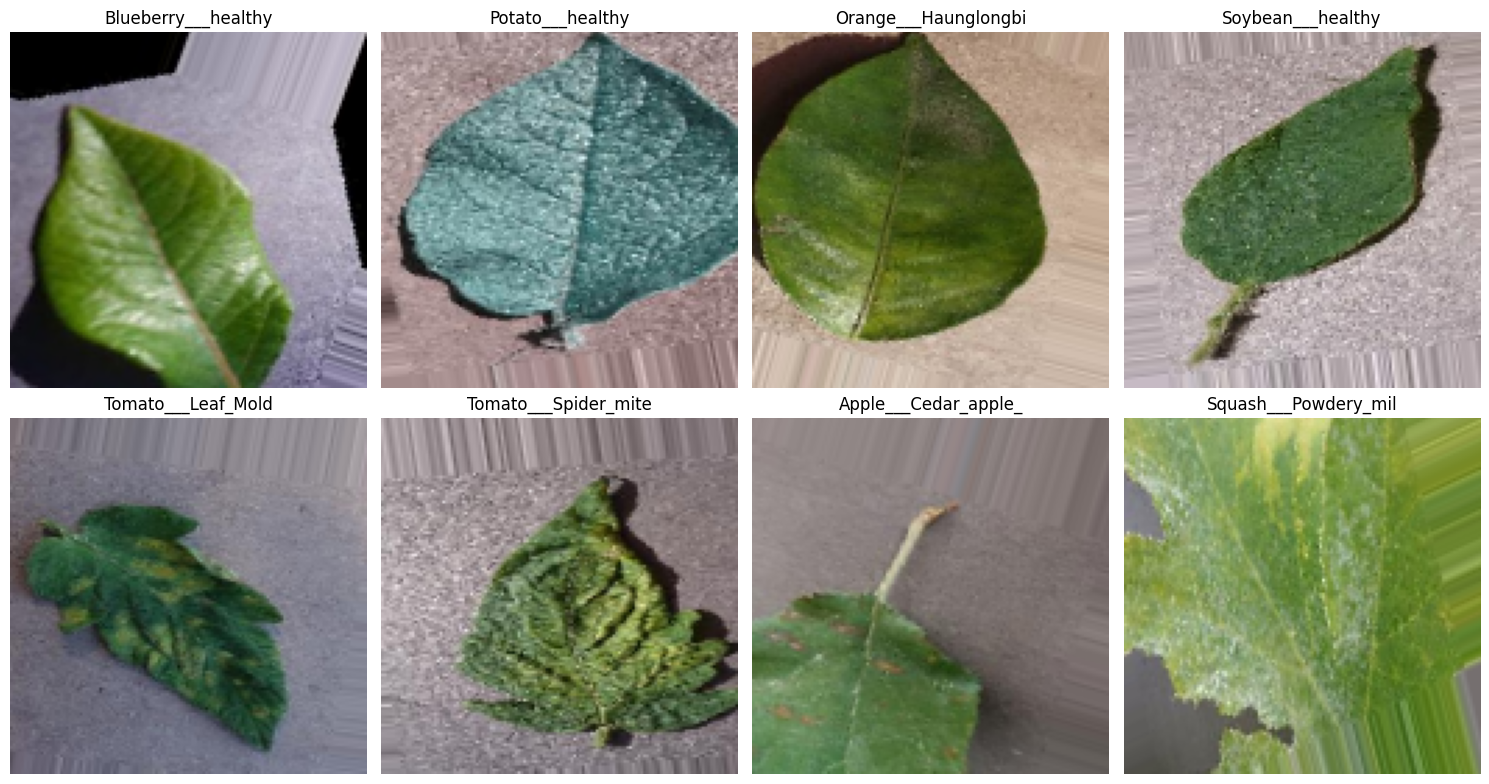

In [ ]:
# Vérifier un batch d'images
images, labels = next(train_generator)
print("Shape des images:", images.shape)
print("Shape des labels:", labels.shape)

# Afficher quelques images
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for i in range(8):
    ax = axes[i//4, i%4]
    ax.imshow(images[i])
    # Trouver la classe
    class_idx = np.argmax(labels[i])
    class_name = list(train_generator.class_indices.keys())[class_idx]
    ax.set_title(class_name[:20])
    ax.axis('off')
plt.tight_layout()
plt.show()

## **5. CRÉATION DU MODÈLE CNN**


### **5.1. Architecture du modèle**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def create_model(input_shape=(128, 128, 3), num_classes=38):
    model = Sequential([
        # Bloc 1
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Bloc 2
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Bloc 3
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Bloc 4
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        # Couches fully connected
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        # Couche de sortie
        Dense(num_classes, activation='softmax')
    ])

    return model

# Créer le modèle
model = create_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 63, 63, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,039,366 (23.04 MB)

 Trainable params: 6,035,910 (23.03 MB)

 Non-trainable params: 3,456 (13.50 KB)

### **5.2. Compiler le modèle**

In [ ]:
# Optimiseur avec learning rate réduit
optimizer = Adam(learning_rate=0.0001)

# Compiler
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

print("Modèle compilé avec succès")

Modèle compilé avec succès!


## **6. ENTRAÎNEMENT DU MODÈLE**


### **6.1. Définir les callbacks**

In [ ]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),

    ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]


### **6.2. Entraînement**

In [ ]:
# Calculer les steps par epoch
train_steps = train_generator.samples // BATCH_SIZE
valid_steps = valid_generator.samples // BATCH_SIZE

print(f"Train steps per epoch: {train_steps}")
print(f"Validation steps: {valid_steps}")

# Entraînement
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    validation_data=valid_generator,
    validation_steps=valid_steps,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)

Train steps per epoch: 2196
Validation steps: 549


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.2039 - loss: 3.3769 - precision: 0.3569 - recall: 0.1026
Epoch 1: val_accuracy improved from -inf to 0.31814, saving model to best_model.keras
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 455s 196ms/step - accuracy: 0.2040 - loss: 3.3765 - precision: 0.3570 - recall: 0.1026 - val_accuracy: 0.3181 - val_loss: 3.1486 - val_precision: 0.3937 - val_recall: 0.2643 - learning_rate: 1.0000e-04
Epoch 2/30
   1/2196 ━━━━━━━━━━━━━━━━━━━━ 2:23 65ms/step - accuracy: 0.6562 - loss: 1.3598 - precision: 0.8000 - recall: 0.3750

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.31814 to 0.31853, saving model to best_model.keras
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6562 - loss: 1.3598 - precision: 0.8000 - recall: 0.3750 - val_accuracy: 0.3185 - val_loss: 3.1708 - val_precision: 0.3935 - val_recall: 0.2655 - learning_rate: 1.0000e-04
Epoch 3/30
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5266 - loss: 1.6029 - precision: 0.6912 - recall: 0.3862
Epoch 3: val_accuracy improved from 0.31853 to 0.45071, saving model to best_model.keras
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 425s 193ms/step - accuracy: 0.5267 - loss: 1.6028 - precision: 0.6912 - recall: 0.3862 - val_accuracy: 0.4507 - val_loss: 2.4739 - val_precision: 0.5357 - val_recall: 0.4045 - learning_rate: 1.0000e-04
Epoch 4/30
   1/2196 ━━━━━━━━━━━━━━━━━━━━ 2:04 57ms/step - accuracy: 0.5625 - loss: 1.4742 - precision: 0.6250 - recall: 0.4688
Epoch 4: val_accuracy did not improve from 0.45071
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accura

## **7. ÉVALUATION ET VISUALISATION**


### **7.1. Visualiser les courbes d'apprentissage**

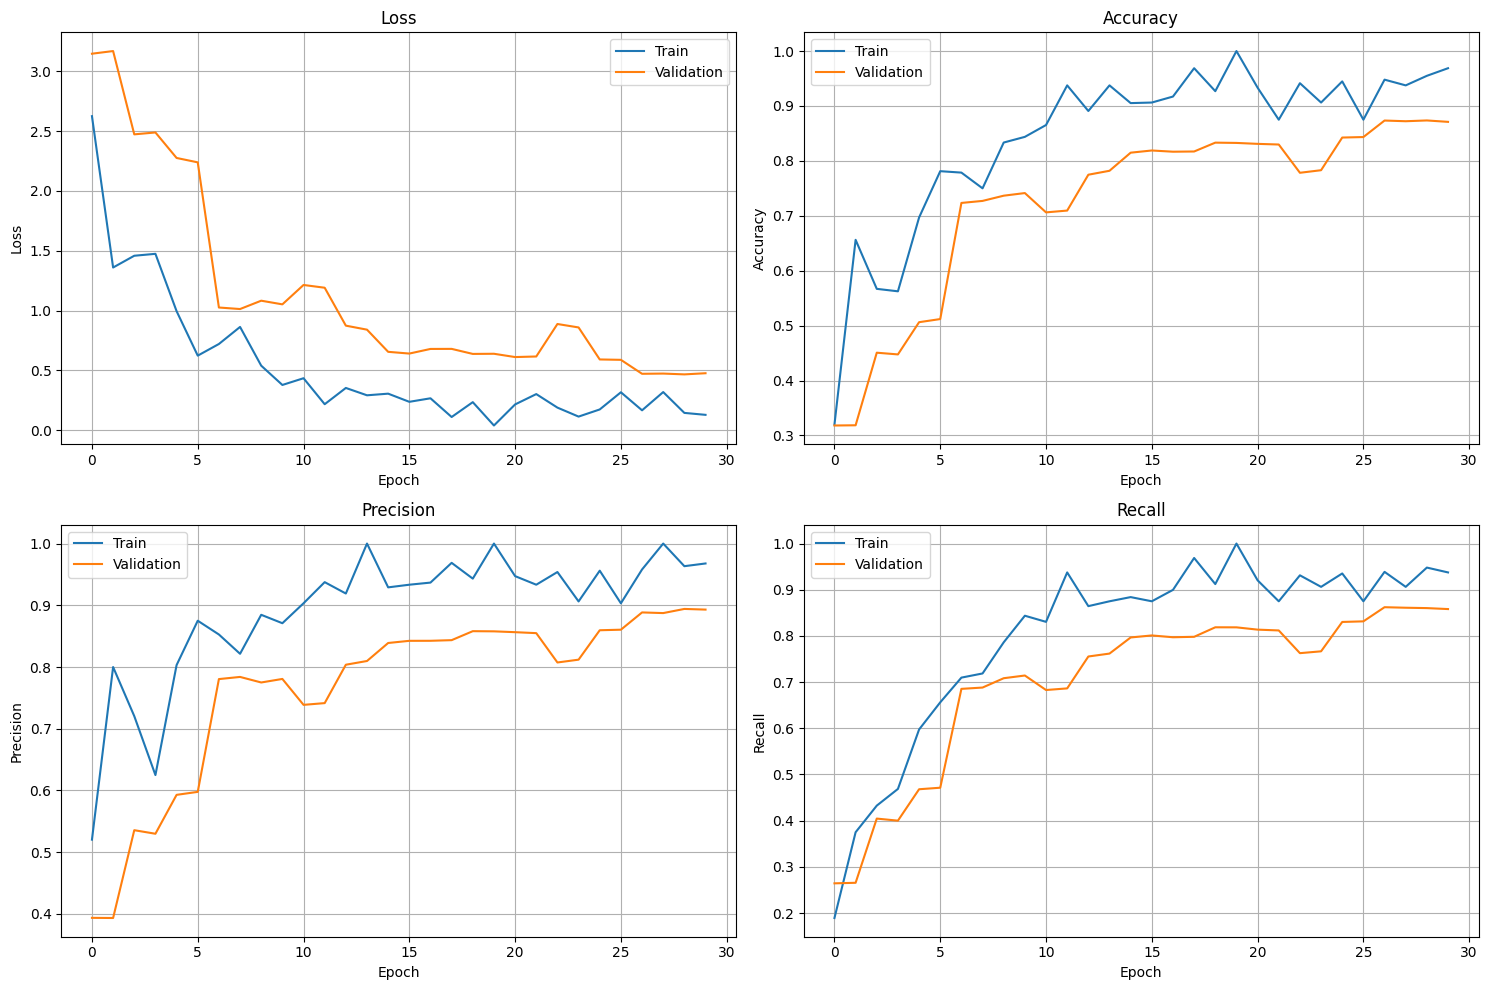

In [20]:
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Loss
    axes[0, 0].plot(history.history['loss'], label='Train')
    axes[0, 0].plot(history.history['val_loss'], label='Validation')
    axes[0, 0].set_title('Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Train')
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 1].set_title('Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    axes[1, 0].plot(history.history['precision'], label='Train')
    axes[1, 0].plot(history.history['val_precision'], label='Validation')
    axes[1, 0].set_title('Precision')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Recall
    axes[1, 1].plot(history.history['recall'], label='Train')
    axes[1, 1].plot(history.history['val_recall'], label='Validation')
    axes[1, 1].set_title('Recall')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

### **7.2. Évaluation sur le jeu de validation**

In [21]:
# Charger le meilleur modèle
model.load_weights('best_model.keras')

# Évaluation
results = model.evaluate(valid_generator, steps=valid_steps, verbose=0)

print("=== RÉSULTATS FINAUX ===")
print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.4f} ({results[1]*100:.2f}%)")
print(f"Precision: {results[2]:.4f}")
print(f"Recall: {results[3]:.4f}")

=== RÉSULTATS FINAUX ===
Loss: 0.4656
Accuracy: 0.8736 (87.36%)
Precision: 0.8941
Recall: 0.8603


### **7.3. Matrice de confusion**

550/550 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step
=== RAPPORT DE CLASSIFICATION ===
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.83      0.90       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.66      0.97      0.78       502
                               Blueberry___healthy       1.00      0.61      0.76       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.90      1.00      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.96      0.90       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
  

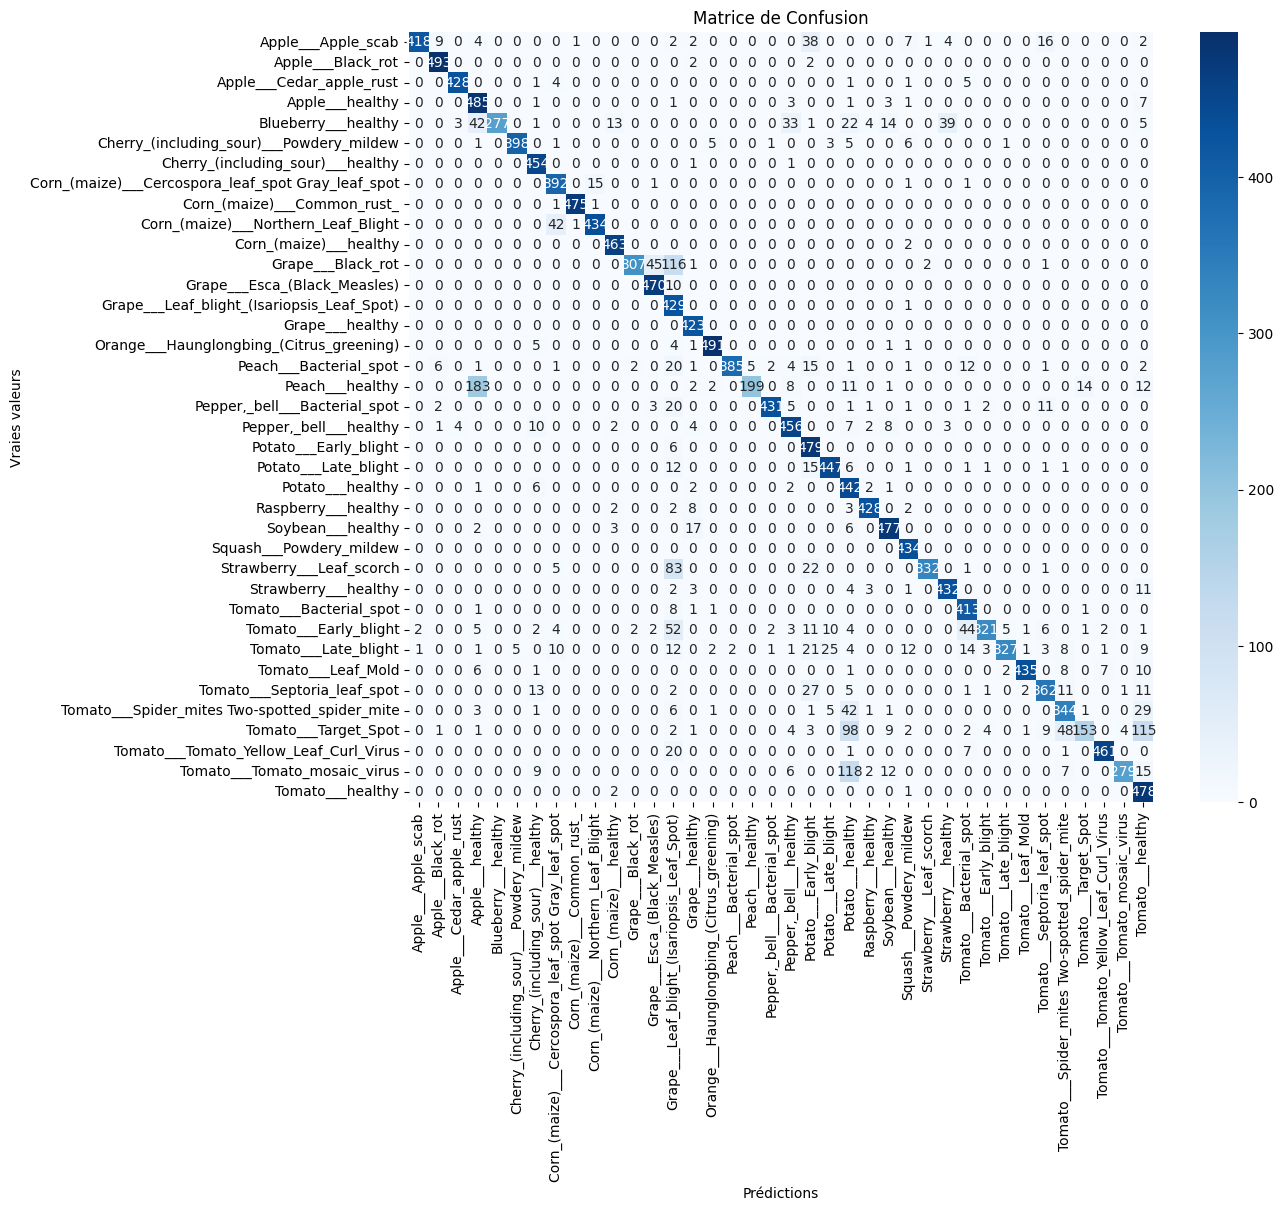

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


predictions = model.predict(valid_generator, steps=len(valid_generator), verbose=1)

# Convertir les probabilités en classes
y_pred = np.argmax(predictions, axis=1)

# Vraies labels
y_true = valid_generator.classes  # nombre exact d'images dans le générateur

# S'assurer que y_pred et y_true ont la même longueur
y_pred = y_pred[:len(y_true)]

# Classification report
print("=== RAPPORT DE CLASSIFICATION ===")
class_names = list(train_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()


## **8. SAUVEGARDE ET EXPORT**

### **8.1. Sauvegarder le modèle**

In [25]:
# Sauvegarder en format .keras
model.save('plant_disease_model.keras')
print("Modèle sauvegardé: plant_disease_model.keras")

# Sauvegarder en format .h5
model.save('plant_disease_model.h5')
print("Modèle sauvegardé: plant_disease_model.h5")

# Sauvegarder uniquement les poids
model.save_weights('plant_disease_weights.weights.h5')
print("Poids sauvegardés: plant_disease_weights.weights.h5")

# Sauvegarder l'historique
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
print("Historique sauvegardé: training_history.pkl")


Modèle sauvegardé: plant_disease_model.keras
Modèle sauvegardé: plant_disease_model.h5
Poids sauvegardés: plant_disease_weights.weights.h5
Historique sauvegardé: training_history.pkl


### **8.2. Télécharger les fichiers**

In [36]:
from google.colab import files

# Créer une liste des fichiers à télécharger
files_to_download = [
    'plant_disease_model.keras',
    'plant_disease_model.h5',
    'plant_disease_weights.h5',
    'best_model.h5',
    'training_history.pkl'
]

# Télécharger
for file in files_to_download:
    if os.path.exists(file):
        files.download(file)
        print(f"Téléchargé: {file}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Téléchargé: plant_disease_model.keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Téléchargé: plant_disease_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Téléchargé: training_history.pkl


## **9. TEST SUR NOUVELLES IMAGES**

### **9.1. Fonction de prédiction**

In [ ]:
def predict_plant_disease(image_path, model, class_names):
    """
    Prédire la maladie d'une plante à partir d'une image
    """
    # Charger et prétraiter l'image
    img = tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=(IMG_SIZE, IMG_SIZE)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prédiction
    predictions = model.predict(img_array)[0]
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class]

    # Top 3 prédictions
    top_3_idx = np.argsort(predictions)[-3:][::-1]

    return {
        'predicted_class': class_names[predicted_class],
        'confidence': float(confidence),
        'top_3': [(class_names[i], float(predictions[i])) for i in top_3_idx],
        'all_predictions': predictions.tolist()
    }

# Tester sur une image
test_image_path = "/content/test5.png"  
result = predict_plant_disease(test_image_path, model, class_names)

print(f"Prédiction: {result['predicted_class']}")
print(f"Confiance: {result['confidence']:.2%}")
print("\nTop 3 prédictions:")
for name, prob in result['top_3']:
    print(f"  {name}: {prob:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prédiction: Corn_(maize)___Common_rust_
Confiance: 100.00%

Top 3 prédictions:
  Corn_(maize)___Common_rust_: 100.00%
  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 0.00%
  Pepper,_bell___Bacterial_spot: 0.00%


### **9.2. Uploader une image de test**

Saving Capture d’écran 2026-01-12 203258.png to Capture d’écran 2026-01-12 203258 (1).png


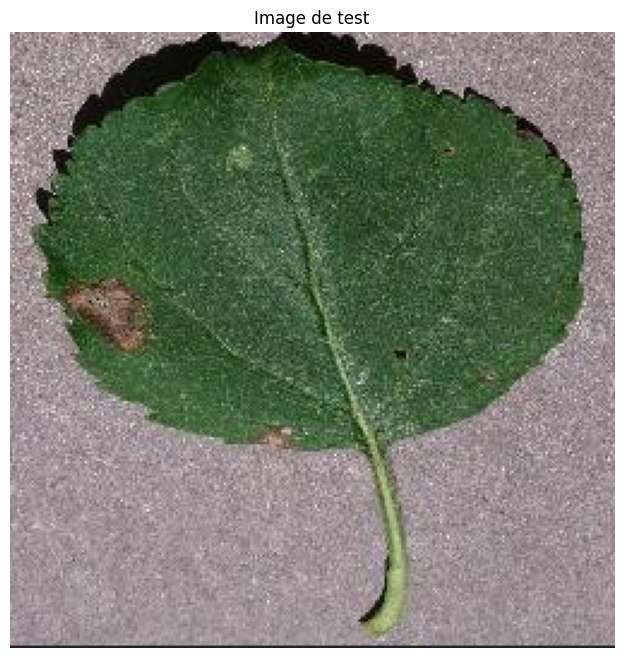

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

RÉSULTAT DE L'ANALYSE

PRÉDICTION: Apple___Black_rot
CONFIANCE: 96.22%
Résultat fiable

 TOP 3 PRÉDICTIONS:
1. Apple___Black_rot (96.22%)
2. Grape___healthy (3.64%)
3. Cherry_(including_sour)___healthy (0.06%)


In [35]:
from google.colab import files

# Uploader une image
uploaded = files.upload()

# Utiliser la première image uploadée
test_image_path = list(uploaded.keys())[0]

# Afficher l'image
img = Image.open(test_image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Image de test")
plt.show()

# Faire la prédiction
result = predict_plant_disease(test_image_path, model, class_names)

# Afficher les résultats
print("\n" + "="*50)
print("RÉSULTAT DE L'ANALYSE")
print("="*50)
print(f"\nPRÉDICTION: {result['predicted_class']}")
print(f"CONFIANCE: {result['confidence']:.2%}")

if result['confidence'] > 0.7:
    print("Résultat fiable")
else:
    print("Faible confiance, vérification recommandée")

print("\n TOP 3 PRÉDICTIONS:")
for i, (name, prob) in enumerate(result['top_3'], 1):
    print(f"{i}. {name} ({prob:.2%})")